# Принятие решений в бизнесе

**Описание проекта:**  
Отдел маркетинга крупного интернет-магазина  подготовил список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**В процессе исследования мы:**  
- Приоритизируем гипотезы об увеличении выручки при помощи разных техник:
    - ICE (показатели - влияние на ключевой показатель,  трудозатраты, уверенность в оценках показателей)
    - RICE (показатели - охват, влияние, трудозатраты, уверенность в оценках)
- Проанализируем результаты A/B-теста:
    - Построим график кумулятивных выручки, среднего чека и среднего количества заказов по группам. 
    - Построим график относительного изменения кумулятивных среднего количества заказов и среднего чека группы B к группе A. 
    - Построим точечный график количества заказов по пользователям.
    - Выберем границу для определения аномальных пользователей.
    - Построим точечный график стоимостей заказов. Сделайте выводы и предположения.
    - Посчитаем статистическую значимость различий в среднем количестве заказов и среднем чеке между группами по «сырым» данным. 
    - Посчитаем статистическую значимость различий в среднем количестве заказов и среднем чеке между группами по «очищенным» данным. 
    - Примем решение по результатам теста.
 
 
**Цель исследования:**  
    Выявить наиболее приоритетные гипотезы об увеличении выручки.  
    Проанализровать результаты А/В теста и принять решение по его итогам.

## Приоритизация гипотез

**Способ приоритизации ICE**  
ICE =  (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»).  
ICE SCORE = (impact*confidence) / efforts

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\voron\OneDrive\Documents\GitHub\Projects\Decision making in business\hypothesis.csv', sep=',') #читаем датасет с гипотезами 
data #Ознакомимся с содержимым файла (всего в датасете 9 гипотез, можно посмотреть сразу на все, не только на первые 5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
#Посмотрим на формулировки гипотез целиком
pd.set_option("max_colwidth", 200)
data['Hypothesis']

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

In [4]:
data['ICE'] = data['Impact']*data['Confidence']/data['Efforts'] #добавляем столбец с фреймворком ICE
round(data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False), 2) #сортируем гипотезы по убыванию их приоритетности 

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Итак, согласно данной техники приоритизации гипотез можно категоризировать их:
- Высокий приоритет:
    - 8 (Запустить акцию, дающую скидку на товар в день рождения),
    - 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей),
    - 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)

- Средний приоритет:
    - 6 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию),
    - 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа)

- Низкий приоритет:
    - 1 (Запустить собственную службу доставки, что сократит срок доставки заказов),
    - 5	(Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов)
    - 3	(Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар)
    - 4	(Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей)	

**Способ приоритизации RICE**  
RICE =  (от англ. reach, impact, confidence, effort / ease «охват, влияние, уверенность, усилия / простота»).  
RICE SCORE = (reach* impact* confidence) / efforts

In [5]:
data['RICE'] = data['Reach']*data['Impact']*data['Confidence']/data['Efforts'] #добавляем столбец с фреймворком RICE
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending = False) #сортируем гипотезы по убыванию их приоритетности 

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее приоритетной для исследования гипотезой становится 7-я (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок).

Средний приоритет у гипотез:
- 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа)
- 0	(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)
- 6	(Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию)  

Низкий приоритет у гипотез:
- 3 (Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар)
- 1	(Запустить собственную службу доставки, что сократит срок доставки заказов)
- 5	(Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов)
- 4	(Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей)

**Отличия в приоритизации между фреймворками ICE и RICE:**  
Отличия возникают потому, что RICE учитывает такой показатель как Reach (охват).
Поэтому, гипотеза об акции "скидка в день рождения" (8-я) обладает невысоким приоритетом, учитывая, что охват пользователей, затронутых этой акцией не так высок.  
В то же время, гипотеза о добавлении формы подписки на все основные страницы укрепила свои позиции, так как она очевидно обладает максимальным охватом.  

**Выводы по приоритизации гипотез:**  
По итогам можно выделить гипотезы, проверка которых обладает самым высоким приоритетом:  
7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.  
0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.  
Две эти гипотезы можно считать приоритетными как с учетом их охвата, так и без.  

Если же говорить об охвате аудитории, то также необходимо упомянуть следующие гипотезы, обладающие высоким приоритетом по RICE:  
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.  
6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	40.0.

## Анализ A/B-теста

### Предобработка данных

In [6]:
#Импортируем необходимые библиотеки
import scipy.stats as stats
import datetime as dt
import numpy as np

In [7]:
#Ознакомимся с представленными датасетами по результатам А/В теста
orders = pd.read_csv(r'C:\Users\voron\OneDrive\Documents\GitHub\Projects\Decision making in business\orders.csv', sep=',')
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
#Изменим тип данных в столбце с датой:
orders['date'] = pd.to_datetime(orders['date'])
#Переименуем столбцы, названия которых представлены не в змеином регистре:
orders = orders.rename(columns={"transactionId": "transaction_id", "visitorId": "visitor_id"})
#Проверим датасет на наличие дубликатов
orders.duplicated().sum()

0

In [9]:
#Посмотрим сколько групп в А/В-тесте
print('Группы А/В-теста:', orders['group'].unique())

Группы А/В-теста: ['B' 'A']


In [10]:
#Уточним даты проведения теста
print("Тест проводился с", orders['date'].min(), "по", orders['date'].max())

Тест проводился с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


In [11]:
#Посмотрим количество пользователей в каждой из групп
orders.groupby('group')['visitor_id'].nunique()

group
A    503
B    586
Name: visitor_id, dtype: int64

В группе В на 16,5 процентов больше пользователей. Это допустимо, но не оптимально

In [12]:
#Посмотрим, есть ли пользователи, попавшие в обе группы, число и сумму их заказов 
both_groups_users = orders.groupby(['visitor_id']).agg({'group' : 'nunique', 'transaction_id' : 'count', 'revenue' : 'sum'}).reset_index()
print(f'Пользователей, попавших в обе группы: {both_groups_users[both_groups_users.group != 1]["visitor_id"].count()}')
print(f"Количество их заказов: {both_groups_users[both_groups_users.group != 1]['transaction_id'].sum()}")
print(f"Сумма заказов: {both_groups_users[both_groups_users.group != 1]['revenue'].sum()}")

Пользователей, попавших в обе группы: 58
Количество их заказов: 181
Сумма заказов: 1558935


Итак, 58 пользователей с достаточно большим числом заказов и суммой их стоимости. Данные об этих пользователях могут повлиять на результаты теста, поэтому их лучше не учитывать при анализе.

In [13]:
#Создадим список ID пользователей, попавших в обе группы
both_groups_users_list = list(both_groups_users[both_groups_users.group != 1]['visitor_id'])
#Оставим в датафрейме Orders только уникальных пользователей
orders = orders.query('visitor_id not in @both_groups_users_list')

In [14]:
visitors = pd.read_csv(r'C:\Users\voron\OneDrive\Documents\GitHub\Projects\Decision making in business\visitors.csv', sep=',')
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [15]:
#Изменим тип данных в столбце с датой:
visitors['date'] = pd.to_datetime(visitors['date'])
#Проверим датасет на наличие дубликатов
visitors.duplicated().sum()

0

In [16]:
#Уточним даты проведения теста, они должны совпадать со значениями из Orders
print("Тест проводился с", visitors['date'].min(), "по", visitors['date'].max())

Тест проводился с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


**Предобработка данных:**  
Пропусков и дубликатов в датасетах нет.  
Тип данных в столбцах с датой изменен на datetime.  
Названия столбцов приведены к змеиному регистру.  

### Аналитическая часть исследования

#### Создание кумулятивных таблиц

In [17]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head(6)

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B


In [18]:
#Соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

#Аналогично получим агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [19]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


### График кумулятивной выручки по группам

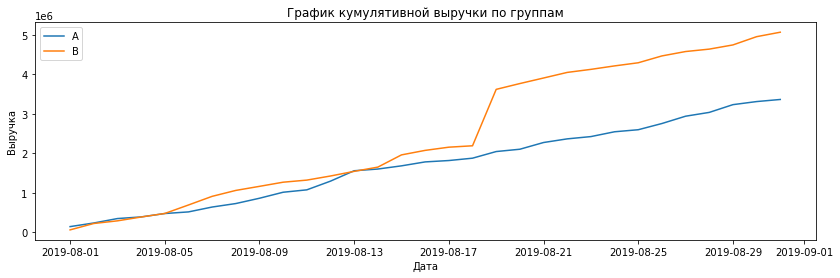

In [20]:
import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(14, 4)) 
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()


Выручка растет в каждой из групп.  
Выручка группы А растет плавно. Что касается группы B, у неё есть резкий всплеск - возможно это является следствием выброса (допустим в этой группе появился человек, сделавший аномально дорогой заказ) - это мы выясним в дальнейшем исследовании.  

### График кумулятивного среднего чека по группам

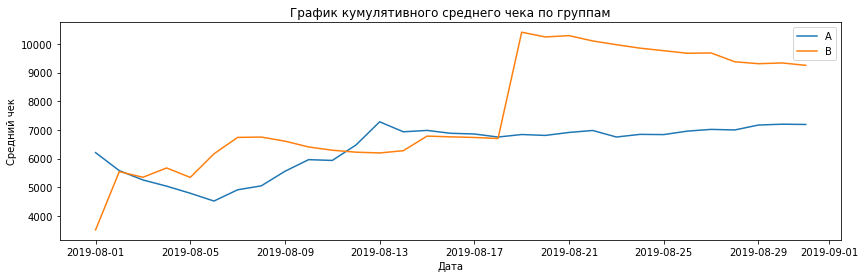

In [21]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(14, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

График кумулятивного среднего чека схож с графиком кумулятивной выручки.  
В группе А через две недеи после начала тестирования произошел резкий подъём среднего чека, затем его значения опустились, теперь растут очень медленно. 
В группе В через примерно 20 дней после начала теста наблюдается резкое увеличение среднего чека, после чего его размер стал снижаться. Возможно это также связано с аномальными показателями некоторых пользователей. Будем разбираться в дальнейшем исследовании.  

### График относительного изменения кумулятивного среднего чека группы B к группе A

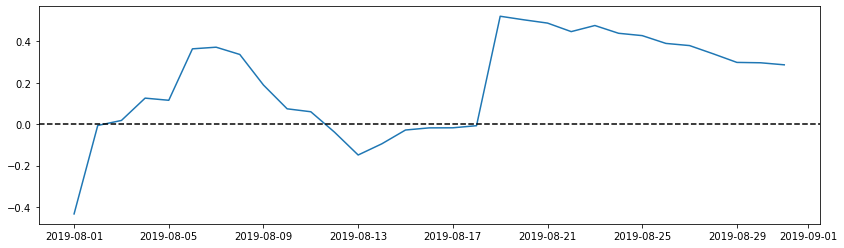

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(14, 4))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем горизонтальную линию поперек оси
plt.axhline(y=0, color='black', linestyle='--') 

Есть точки, в которых наблюдаются очень резкие перепады. Скорее всего, очень крупные заказы затесались в группу А ближе к 13 августа 2019 года и в группу В через неделю после этого.   


### График кумулятивного среднего количества заказов по группам

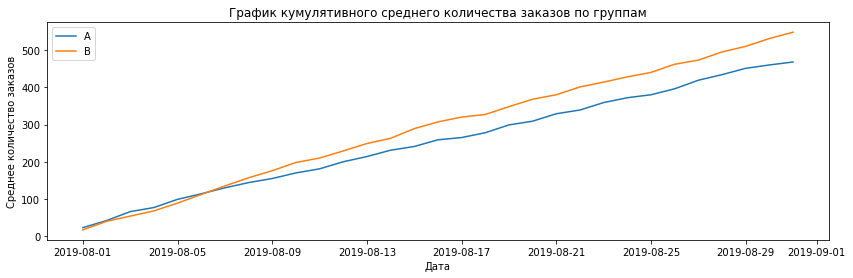

In [23]:
#Построим графики среднего количества заказов по группам:
plt.figure(figsize=(14, 4)) 
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'], label='B')

plt.legend()

plt.title('График кумулятивного среднего количества заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.show()

График довольно равномерный: количество заказов растёт, группа В вышла вперед через неделю после начала тестирования и выглядит более успешной по этому показателю. Аномальных скачков не наблюдается.  

### График относительного изменения кумулятивного среднего кол-ва заказов группы B к группе A

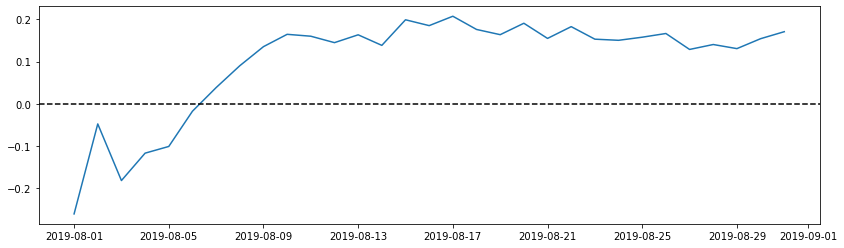

In [24]:
plt.figure(figsize=(14, 4))
# cтроим отношение среднего количества заказов
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['ordersA'])-1)

# добавляем горизонтальную линию поперек оси
plt.axhline(y=0, color='black', linestyle='--') 

На этом графике видно, что в период с 5 по 9 в группе В среднее количество заказов увеличилось довольно сильно. Возможно появились пользователи, сделавшие довольно много заказов. В дальнейшем разница в среднем количестве заказов остается на стабильном уровне (в группе В их больше на 10-15) процентов.

### Точечный график количества заказов по пользователям

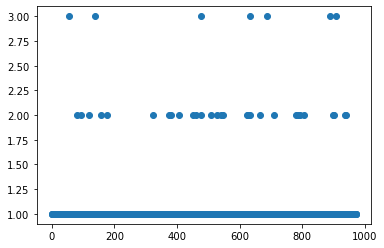

In [25]:
#Создадим таблицу, в которой группируем пользователей по числу сделанных заказов
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

Точечная диаграмма показывает, что стандартное число заказов на одного пользователя - 1.  
Встречаются пользователи с 2-мя заказами - это довольно редкие случаи, 3 заказа - еще реже.  
Более точно можно будет сказать, посмотрев на перцентили.

In [26]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Итак, не более 5% пользователей оформляли более 1 заказа, менее 1% - более 2.
Отсеем аномальных пользователей, взяв за границу 1 заказ.

### Точечный график стоимостей заказов

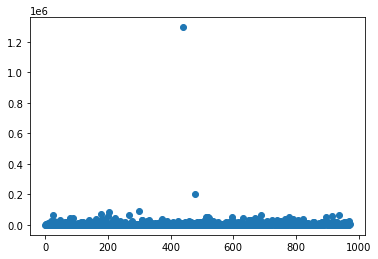

In [27]:
#Создадим таблицу, в которой группируем пользователей по сумме стомости их заказов
revenueByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'revenue': 'sum'})
)
revenueByUsers.columns = ['visitor_id', 'revenue']
x_values = pd.Series(range(0,len(revenueByUsers)))

plt.scatter(x_values, revenueByUsers['revenue']) 

В глаза бросаются несколько пользователей с суммой заказов свыше 100 000 и один очень щедрый клиент, потративший на свой заказ больше 1200000. Это явно выбросы, что подтвердят и перцентили.

In [28]:
#Страна должна знать своих героев, посмотрим на ID самых щедрых клиентов
revenueByUsers.sort_values(by='revenue', ascending = False).head(10)

,visitor_id,revenue
440,1920142716,1294500
477,2108080724,202740
300,1307669133,92550
202,888512513,86620
176,759473111,72000
938,4133034833,67990
687,2988190573,67190
267,1164614297,66350
25,148427295,65710
200,887908475,60450


In [29]:
np.percentile(revenueByUsers['revenue'], [95, 99])

array([28910., 59082.])

95 процентов пользователей укладываются в 28910 у.е., 99 процентов - в 59082.  
Аномальными будем считать тех, кто тратит больше 29000 - они, конечно, важны для интернет-магазина, но для А/В теста их заказы сослужат плохую службу.

### Cтатистическая значимость различий в среднем количестве заказов между группами по «сырым» данным

**Сырые данные** -  данные без удаления аномальных пользователей.  
Сформируем гипотезы:  
- Нулевая: различий в среднем количестве заказов между группами нет.  
- Альтернативная: различия в среднем между группами есть.

In [30]:
#количество посетителей сайта из группы А в каждый из дней исследования:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']] 
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#кумулятивное количество посетителей сайта из группы А в каждый из дней исследования:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1, )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#количество посетителей сайта из группы В в каждый из дней исследования:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#количество посетителей сайта из группы В в каждый из дней исследования:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#количество заказов и их стоимость из группы А в каждый из дней исследования:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#кумулятивное количество заказов и их стоимость из группы А в каждый из дней исследования:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1,).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA']

#количество заказов и их стоимость из группы В в каждый из дней исследования:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#кумулятивное количество заказов и их стоимость из группы В в каждый из дней исследования:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB']

# Создадим таблицу, в которой объединим все созданные ранее в этом окне кода
ABdata = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ABdata.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [31]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'orders'].  
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [32]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
#SampleA будет состоять из двух частей:
#Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].
#Нули для пользователей, которые ничего не заказывали.
#Их количество равно разнице между суммой посетителей и количеством записей о заказах
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,
index=np.arange(ABdata['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

#Та же схема для группы B
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,
index=np.arange(ABdata['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

**Определяем статистическую значимость:**  
Выборки подвергаем проверке критерием Манна-Уитни.

В sampleA сохранена выборка, где каждый элемент — число заказов определённого пользователя, в том числе ноль.  
Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов.  
Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean().  
Аналогично найдём среднее группы B: SampleB.mean().  
Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1. 

In [33]:

print(f'P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print(f'Относительный прирост среднего числа заказов группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


P-value: 0.011
Относительный прирост среднего числа заказов группы B: 0.160


**Вывод:**  
По «сырым» данным различия в среднем числе заказов групп A и B есть.
P-value = 0.011 меньше 0.05. Значит, мы отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет.  
Относительный выигрыш группы B равен 16% — второе число в выводе.


### Статистическая значимость различий в среднем чеке между группами

Сформулируем предположения:  
- Нулевая гипотеза: различий в среднем чеке между группами нет.
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [34]:
print(f'P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print(f'Относительный прирост среднего чека заказов группы B:', '{0:.3f}'.format(orders[orders['group']=='B']
['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


P-value: 0.829
Относительный прирост среднего чека заказов группы B: 0.287


**Вывод:**  
P-value 0.829 больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  
Второй показатель говорит о приросте среднего чека заказов группы В на 28,7 процента, но учитывая то, что нулевую гипотезу мы не отвергаем, можно говорить о том, что различия здесь получены случайным образом.

### Определение "аномальных пользователей"

**Очищенные данные** - данные без "аномальных" пользователей, сделавших очень большое количество заказов либо потративших очень большую сумму.  

In [35]:
# Сделаем срезы пользователей с числом заказов больше 1
too_many_orders = 1
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > too_many_orders]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > too_many_orders]['visitor_id'],
    ],
    axis=0,
)


# Сделаем срезы пользователей, совершивших заказы стоимостью больше 29000
too_much_revenue = 29000
usersWithExpensiveOrders = orders[orders['revenue'] > too_much_revenue]['visitor_id']

#Объединим срезы в список "аномальных пользователей"
#Не забудем удалить дубликаты (пользователи одновременно могут и делать много заказов и тратить много денег)
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())
len(abnormalUsers)

79

79 пользователей - молодцы, много заказывают, тратят в магазине большие деньги. Но для объективного А/В теста они являются помехой.

### Cтатистическая значимость различий в среднем количестве заказов между группами по «очищенным» данным

Гипотезы те же:
- Нулевая: различий в среднем количестве заказов между группами нет.
- Альтернативная: различия в среднем между группами есть.

In [36]:
#Подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],
pd.Series(0, index=np.arange(ABdata['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
pd.Series(0, index=np.arange(ABdata['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

#В этих выборках пользователям из разных групп будет соответствовать количество заказов, тем кто заказов не делал - нули.
#Из выборки исключены "аномальные пользователи"

In [37]:
#Применим статистический критерий Манна-Уитни к полученным выборкам
print(f'P-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
#Выведем относительный прирост среднего числа заказов группы B
print(f'Относительный прирост среднего числа заказов группы B:', "{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

P-value: 0.012
Относительный прирост среднего числа заказов группы B: 0.180


**Вывод:**  
Очищенные данные дают те же результаты, что и сырые. Показатель P-value меньше 0,05: нулевую гипотезу отвергаем.  
Различия между группами есть, вторая группа даёт на 18 % процентов больше заказов

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем предположения:  
- Нулевая гипотеза: различий в среднем чеке между группами нет.
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [38]:
print(f'P-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))
print(f'Относительный прирост среднего чека заказов группы B:', "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]
['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]
['revenue'].mean()- 1)) 

P-value: 0.836
Относительный прирост среднего чека заказов группы B: -0.009


**Вывод:**
Нулевую гипотезу отвергнуть нельзя - значение P-value выше 0.05.  
В выборках с очищенными данными группа B показывает средний чек на 0,9 процента ниже, чем группа А.

## Выводы по результатам А/В-теста

Графики кумулятивной выручки, среднего чека и количества заказов показывают преимущество группы В.  
При этом, существуют резкие скачки - как мы выяснили в ходе исследования, они связаны с поведением "аномальных" пользователей - они делают большое количество заказов и тратят суммы, гораздо больше средних значений.  
В связи с этим, в процессе исследования были проверены гипотезы о различиях в изучаемых группах в двух видах:  
- По сырым данным (без удаления аномальных пользователей)
- По очищенным данным (без учета аномальных пользователей)

Для групп А и В были проверены гипотезы о различиях в среднем количестве заказов и среднем чеке.  
И по сырым и по очищенным данным можно констатировать:
- Различия в среднем количестве заказов между группами есть. По сырым данным это 16 процентов в пользу группы В, по очищенным группа В превышает А на 18 %.  
- Различий в среднем чеке между группами нет.  На значения относительного прироста среднего чека группы В явно повлияло аномальное значение одного из чеков (покупка стоимостью более миллиона у.е). По очищенным от выбросов данным можно утверждать, что в целом средний чек группы В не выше, чем у группы А.

## Решение по результатам теста 

Опираясь на данные, полученные в результате исследования, **принято решение остановить А/В-тест и зафиксировать победу группы В**.  Напомним, задача, которая стоит перед интернет-магазином это увеличение выручки.  
Изменения, которые предполагаются в случае победы группы В могут привести к увеличению количества заказов примерно на 18% - это поможет увеличить выручку, при том, что средний чек не станет меньше.